In [1]:
# Import modules
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# helpers
%matplotlib inline

In [2]:
# Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
# Model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
# cross validation
from sklearn.model_selection import train_test_split

In [5]:
# Import the data set
df = pd.read_csv('credit1.csv')
credit = df

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


## Regression testing comparing 
### RandomForestRegressor, Linear regression and Support Vector Regression

In [7]:
algosClass = []

In [8]:
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))

In [9]:
algosClass.append(('Linear Regression',LinearRegression()))

In [10]:
algosClass.append(('Support Vector Regression',SVR()))

In [11]:
# Use all features for independent variables
X = credit.iloc[:,2:25]
X.head(5)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,0
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [12]:
y=credit['LIMIT_BAL']
y.head(5)

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [13]:
# Load results into the array
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X, y, cv=3, scoring='r2')
        names.append(name)
        results.append(result)

In [30]:
# Print out the results for predicting LIMIT_BAL 
for i in range(len(names)):
   print(names[i],results[i].mean())

# Random Forest Regressor is best model for predicting LIMIT-BAL, has r2 error of .47
# This is a poor predictor

# Greater than 0.7 is a good predictor
# Between .5 and .7 is moderate
# Less than .5 is poor

Random Forest Regressor 0.46701043246736756
Linear Regression 0.3500726362741815
Support Vector Regression -0.05035048298881654


## Based on results, selected RFR since it has the highest score
## Initial effort, model has all features

In [14]:
# Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split (X,y,
                                                    test_size = .30, random_state = 123)

In [24]:
# Select RandomForestRegressor as the modeling algorithm
algo = RandomForestRegressor()

In [26]:
# Train the model
modelRF = algo.fit(X_train, y_train)

In [17]:
# Make forecasts
predictions = modelRF.predict(X_test)
predRsquared= r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

# The results show that this is not a good predictor with all features
# The r2 of .469 indicates that the model explains less than 50% of the error
# The root mean square error of 94,000 shows that it is a very poor predictor

R Squared: 0.470
RMSE: 93682.924


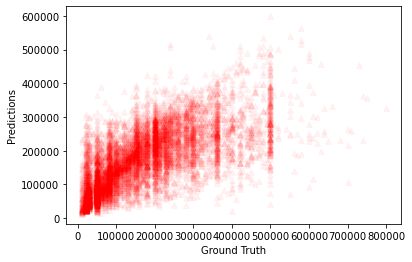

In [18]:
# Plot the results of the test
plt.scatter(y_test, predictions, 
           color="r",
         #  c=['.7'],
           alpha = .05,
            linewidths=.5,
           marker = '^')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();
# No line to compare, lots of finagling trying to make the plot useful

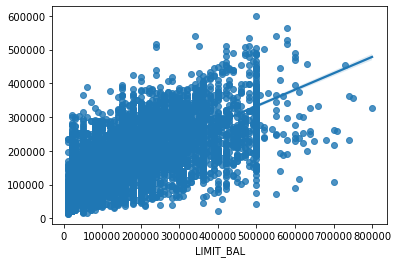

In [19]:
# Seaborn plot with regression line.  Looks very similar to plot above, but has 
# the best fit line
x=y_test
y=predictions
data=x,y
# print(x,y)
ax=sns.regplot(x=x, y=y, data=data)

## Modeling Limit Balance - with customer features only
## Hoping for better results

In [62]:
# Use customer attributes for independent variables
X = credit.iloc[:,np.r_[2:6,24:25]]
X.head(5)

,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT
0,2,2,1,24,0
1,2,2,2,26,0
2,2,2,2,34,1
3,2,2,1,37,1
4,1,2,1,57,1


In [63]:
y=credit['LIMIT_BAL']
y.head(5)

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [64]:
# Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split (X,y,
                                                    test_size = .30, random_state = 123)

In [65]:
# Select RandomForestRegressor as the modeling algorithm
algo = RandomForestRegressor()

In [66]:
# Train the model
modelRFAttr = algo.fit(X_train, y_train)

In [67]:
# Make forecasts
predictions = modelRFAttr.predict(X_test)
predRsquared= r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
# The results are worse than with all attributes, this is a poor predictor
# r2  .175, RMSE 116,885
# The r2 of .176 indicates that the model explains less than 20% of the error
# The root mean square error of 116,838 shows that it is a very poor predictor

R Squared: 0.176
RMSE: 116838.763


## Modeling Limit Balance - with the 6 pay_x columns only
## Hoping for better results

In [32]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [39]:
# Use customer attributes for independent variables
X = credit.iloc[:,6:12]
X.head(5)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [46]:
# Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split (X,y,
                                                    test_size = .30, random_state = 123)

In [41]:
# Select RandomForestRegressor as the modeling algorithm
algo = RandomForestRegressor()

In [42]:
# Train the model
modelRFPayx = algo.fit(X_train, y_train)

In [43]:
# Make forecasts
predictions = modelRFPayx.predict(X_test)
predRsquared= r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
# The results are worse than with all attributes, this is a poor predictor
# The r2 of .105 indicates that the model explains just over 10% of the error
# The root mean square error of 121,737 shows that it is a very poor predictor

R Squared: 0.105
RMSE: 121736.887


## Modeling Limit Balance - with the 6 BILL_AMT columns only
## Hoping for better results

In [7]:
# Use customer attributes for independent variables
X = credit.iloc[:,12:18]
X.head(5)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [8]:
y=credit['LIMIT_BAL']
y.head(5)

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [9]:
# Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split (X,y,
                                                    test_size = .30, random_state = 123)

In [10]:
# Select RandomForestRegressor as the modeling algorithm
algo = RandomForestRegressor()

In [11]:
# Train the model
modelRFBillAmt = algo.fit(X_train, y_train)

In [12]:
# Make forecasts
predictions = modelRFBillAmt.predict(X_test)
predRsquared= r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
# This model is also a poor predictor
# The r2 of .327 indicates that the model explains nearly 33% of the error
# The root mean square error of 105,558 shows that it is a very poor predictor

R Squared: 0.327
RMSE: 105558.332


### Modeling Limit Balance - with the 6 PAY_AMT columns only
### Hoping for better results

In [13]:
# Use customer attributes for independent variables
X = credit.iloc[:,np.r_[18:24]]
X.head(5)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [15]:
y=credit['LIMIT_BAL']
y.head(5)

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [16]:
# Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split (X,y,
                                                    test_size = .30, random_state = 123)

In [17]:
# Select RandomForestRegressor as the modeling algorithm
algo = RandomForestRegressor()

In [18]:
# Train the model
modelRFPayAmt = algo.fit(X_train, y_train)

In [19]:
# Make forecasts
predictions = modelRFPayAmt.predict(X_test)
predRsquared= r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
# This model is also a poor predictor
# The r2 of .289 indicates that the model explains nearly 33% of the error
# The root mean square error of 108,479 shows that it is a very poor predictor

R Squared: 0.289
RMSE: 108479.199


# Using the data provided, we cannot predict how much
# credit to extend using linear regression techiques